# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country inc_class  
0          2174             0              40   United-States     <=50K  
1             0             0              13   United-States     <=50K  
2             0             0              40   United-States     <=50K  
3             0             0              40   United-States     <=50K  
4             0             0              40            Cuba     <=50K

In [4]:
ds.shape

(32561, 15)

# Data exploration

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  inc_class       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Describe (stats)

In [6]:
ds.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
ds.describe(include=['O'])

workclass education       marital-status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native-country inc_class  
count    32561  32561           32561     32561  
unique       5      2              42         2  
top      White   Male   United-States     <=50K  
freq     27816  21790           29170     24720

## Unique values

In [8]:
cat_cols=list(ds.dtypes[ds.dtypes=='object'].index)[:-1]

In [9]:
for c in cat_cols:
    print(c)
    print('========')
    print(ds[c].unique())
    print()

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' I

## Group

In [10]:
def gr_col(col):
    print(col)
    print('============')
    display(ds[['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count())
    ds[ds.inc_class==' >50K'][['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count().plot(kind='pie', subplots=True, figsize=(15,15), title=col)
    ds[ds.inc_class==' <=50K'][['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count().plot(kind='pie', subplots=True, figsize=(15,15))
    print()

workclass


fnlwgt
inc_class workclass                
 <=50K     ?                   1645
           Federal-gov          589
           Local-gov           1476
           Never-worked           7
           Private            17733
           Self-emp-inc         494
           Self-emp-not-inc    1817
           State-gov            945
           Without-pay           14
 >50K      ?                    191
           Federal-gov          371
           Local-gov            617
           Private             4963
           Self-emp-inc         622
           Self-emp-not-inc     724
           State-gov            353


education


fnlwgt
inc_class education            
 <=50K     10th             871
           11th            1115
           12th             400
           1st-4th          162
           5th-6th          317
           7th-8th          606
           9th              487
           Assoc-acdm       802
           Assoc-voc       1021
           Bachelors       3134
           Doctorate        107
           HS-grad         8826
           Masters          764
           Preschool         51
           Prof-school      153
           Some-college    5904
 >50K      10th              62
           11th              60
           12th              33
           1st-4th            6
           5th-6th           16
           7th-8th           40
           9th               27
           Assoc-acdm       265
           Assoc-voc        361
           Bachelors       2221
           Doctorate        306
           HS-grad         1675
           Masters          959
           Prof-school      423
           Some-college    1387


marital-status


fnlwgt
inc_class marital-status                
 <=50K     Divorced                 3980
           Married-AF-spouse          13
           Married-civ-spouse       8284
           Married-spouse-absent     384
           Never-married           10192
           Separated                 959
           Widowed                   908
 >50K      Divorced                  463
           Married-AF-spouse          10
           Married-civ-spouse       6692
           Married-spouse-absent      34
           Never-married             491
           Separated                  66
           Widowed                    85


occupation


fnlwgt
inc_class occupation                
 <=50K     ?                    1652
           Adm-clerical         3263
           Armed-Forces            8
           Craft-repair         3170
           Exec-managerial      2098
           Farming-fishing       879
           Handlers-cleaners    1284
           Machine-op-inspct    1752
           Other-service        3158
           Priv-house-serv       148
           Prof-specialty       2281
           Protective-serv       438
           Sales                2667
           Tech-support          645
           Transport-moving     1277
 >50K      ?                     191
           Adm-clerical          507
           Armed-Forces            1
           Craft-repair          929
           Exec-managerial      1968
           Farming-fishing       115
           Handlers-cleaners      86
           Machine-op-inspct     250
           Other-service         137
           Priv-house-serv         1
           Prof-specialty       1859
           Protective-serv       211
           Sales                 983
           Tech-support          283
           Transport-moving      320


relationship


fnlwgt
inc_class relationship           
 <=50K     Husband           7275
           Not-in-family     7449
           Other-relative     944
           Own-child         5001
           Unmarried         3228
           Wife               823
 >50K      Husband           5918
           Not-in-family      856
           Other-relative      37
           Own-child           67
           Unmarried          218
           Wife               745


race


fnlwgt
inc_class race                       
 <=50K     Amer-Indian-Eskimo     275
           Asian-Pac-Islander     763
           Black                 2737
           Other                  246
           White                20699
 >50K      Amer-Indian-Eskimo      36
           Asian-Pac-Islander     276
           Black                  387
           Other                   25
           White                 7117


sex


fnlwgt
inc_class sex            
 <=50K     Female    9592
           Male     15128
 >50K      Female    1179
           Male      6662


native-country


fnlwgt
inc_class native-country          
 <=50K     ?                   437
           Cambodia             12
           Canada               82
           China                55
           Columbia             57
...                            ...
 >50K      Thailand              3
           Trinadad&Tobago       2
           United-States      7171
           Vietnam               5
           Yugoslavia            6

[82 rows x 1 columns]

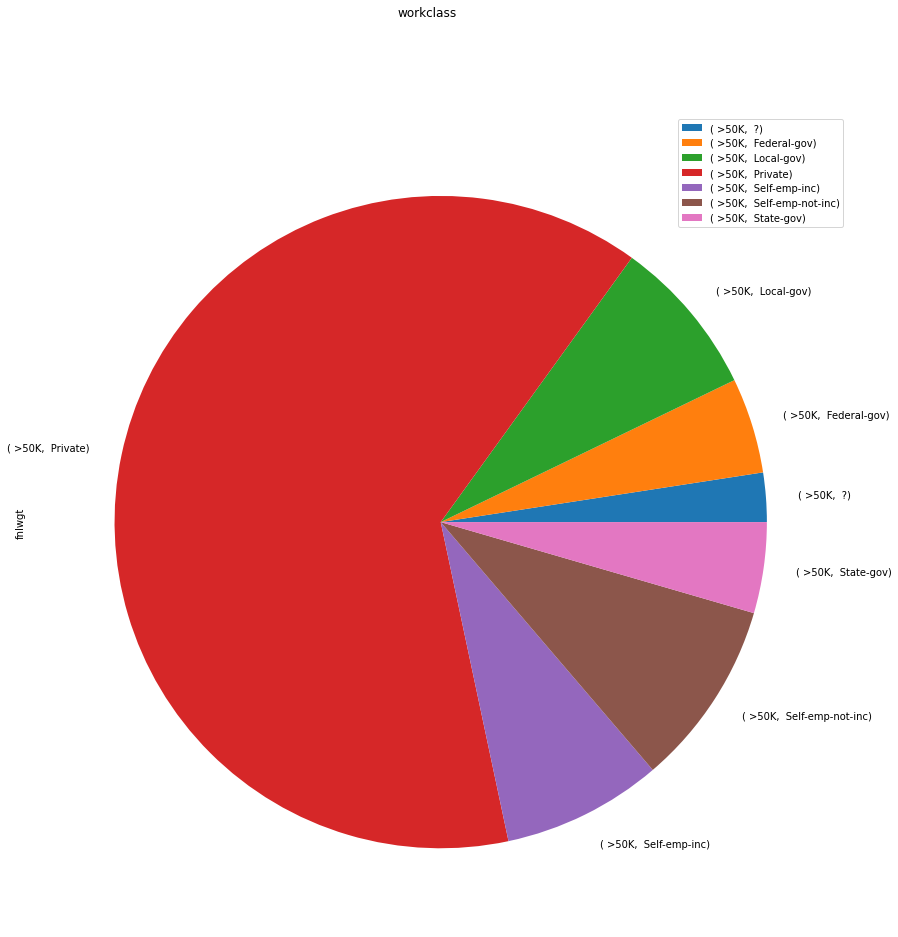

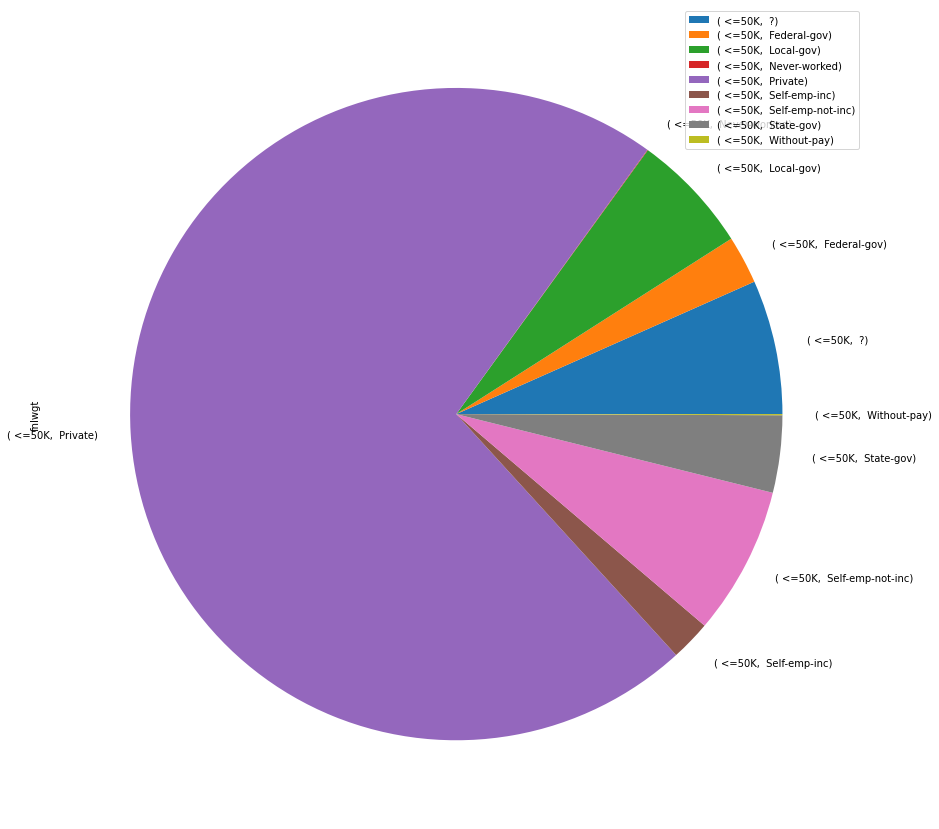

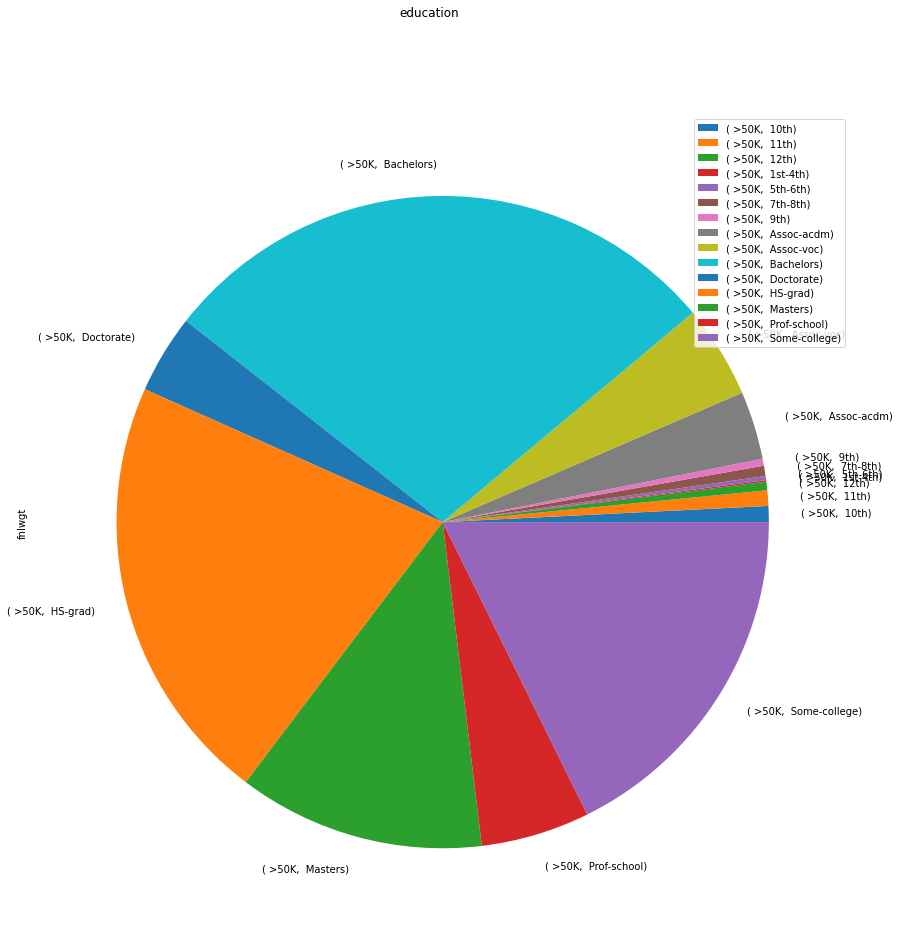

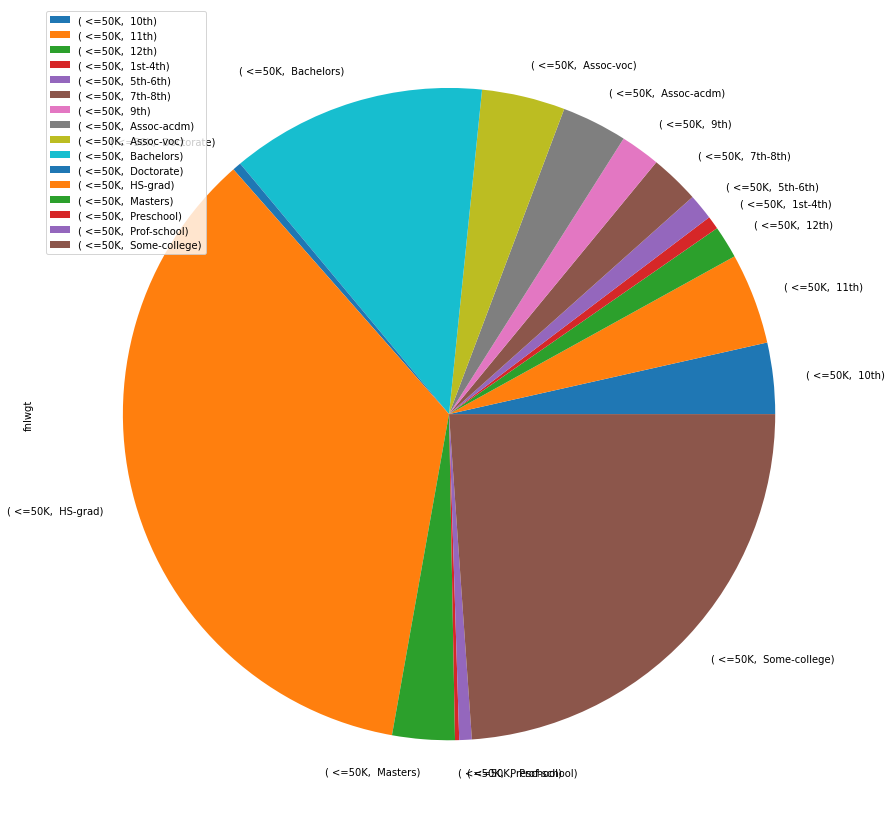

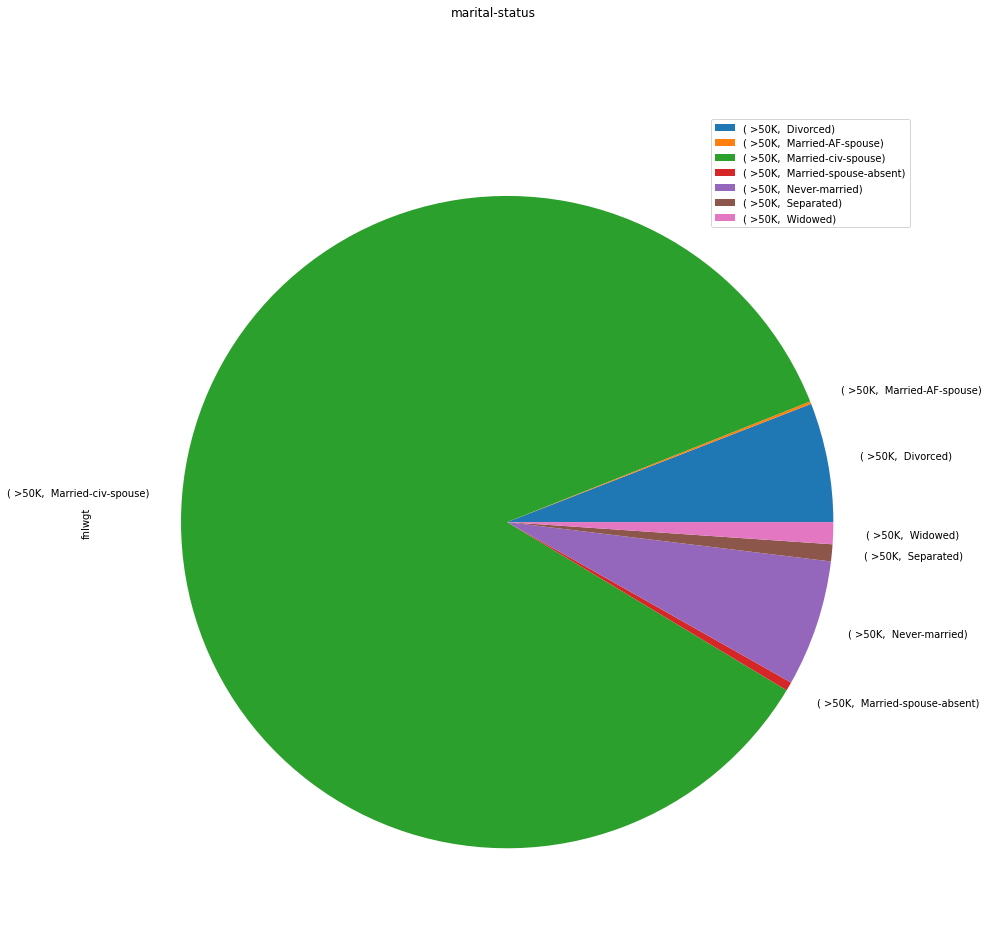

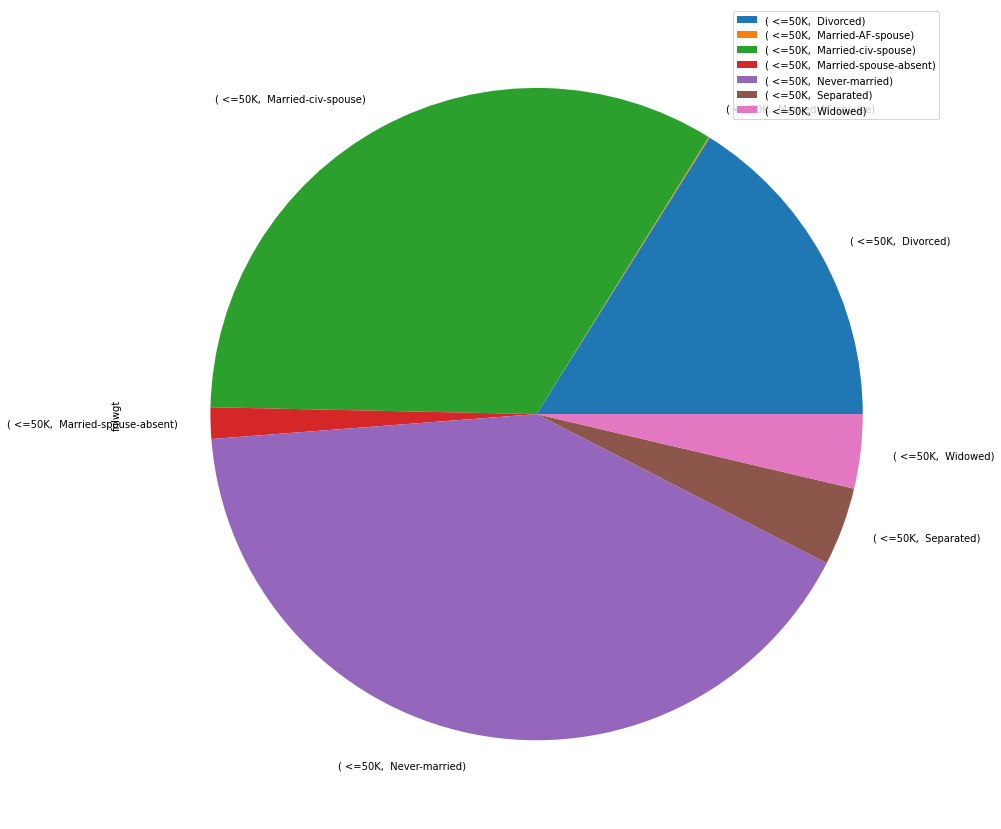

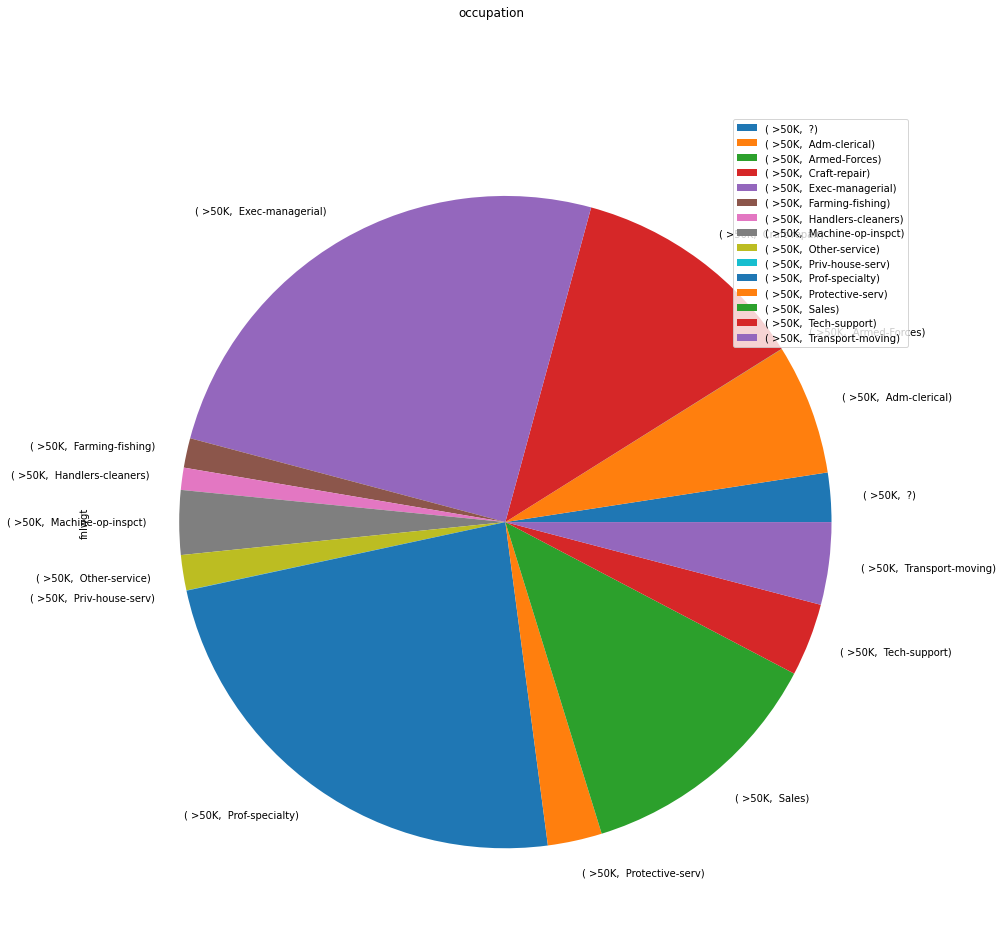

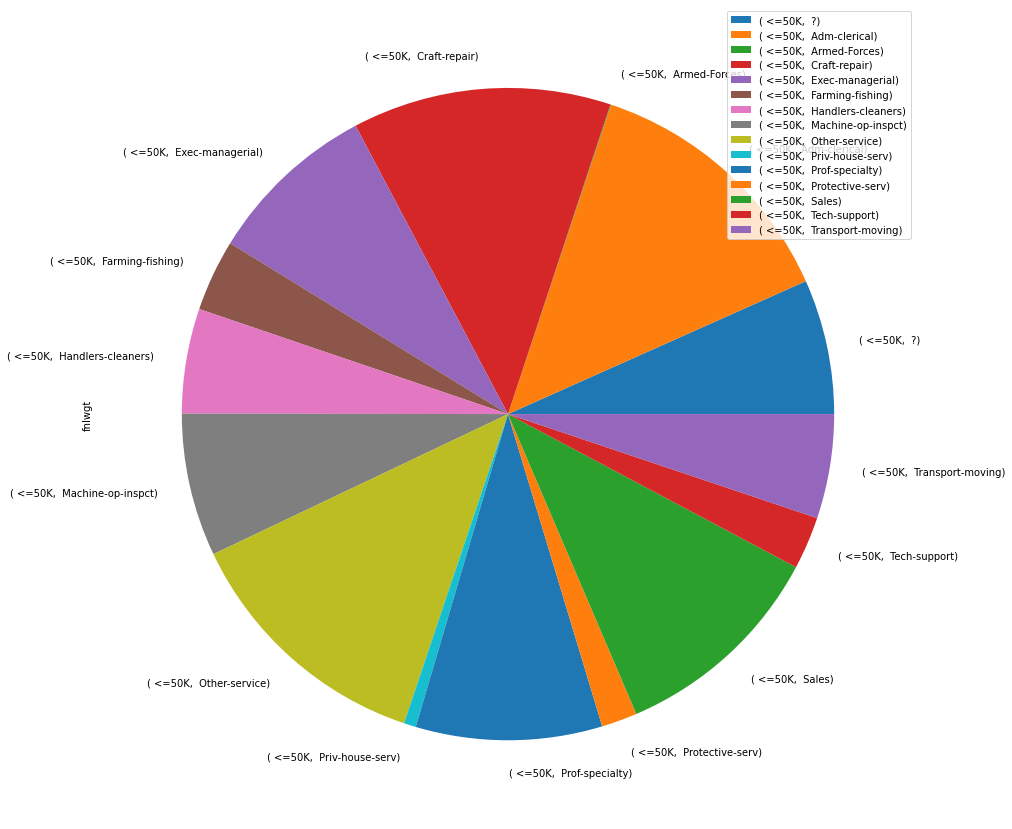

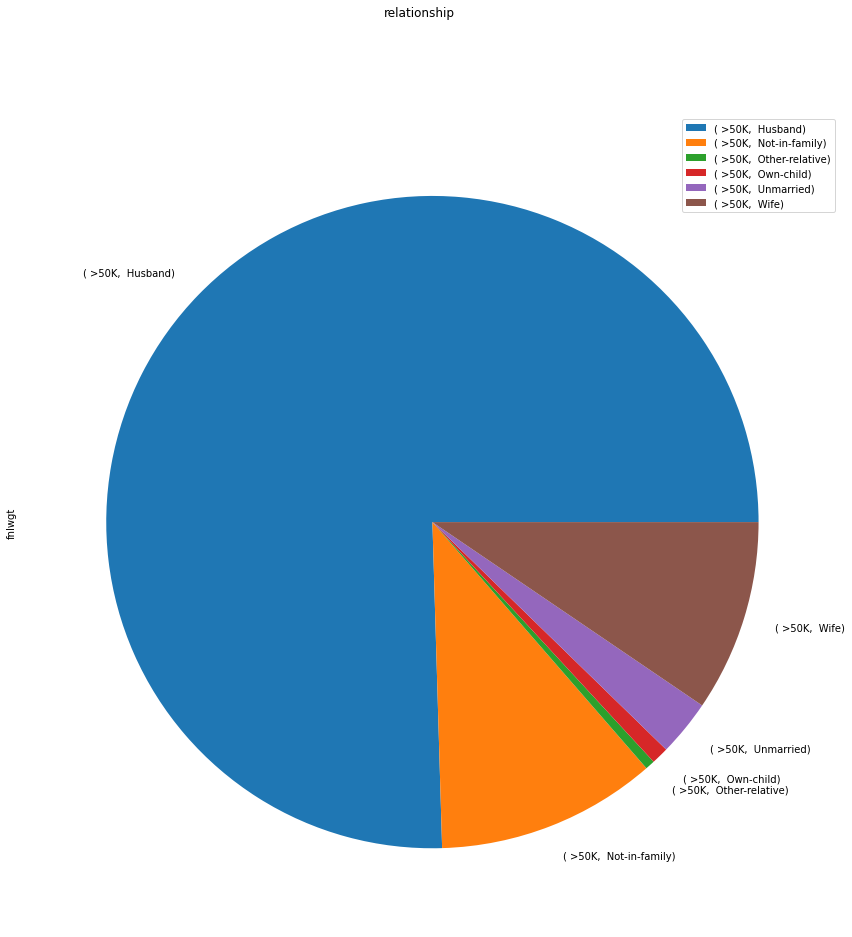

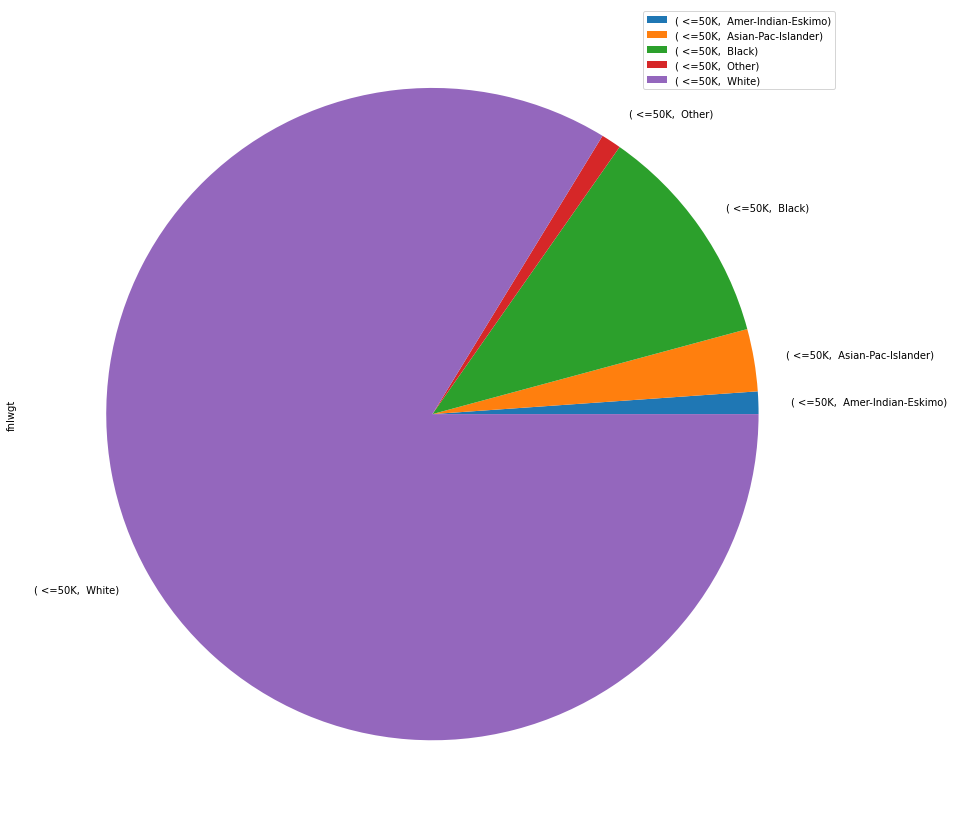

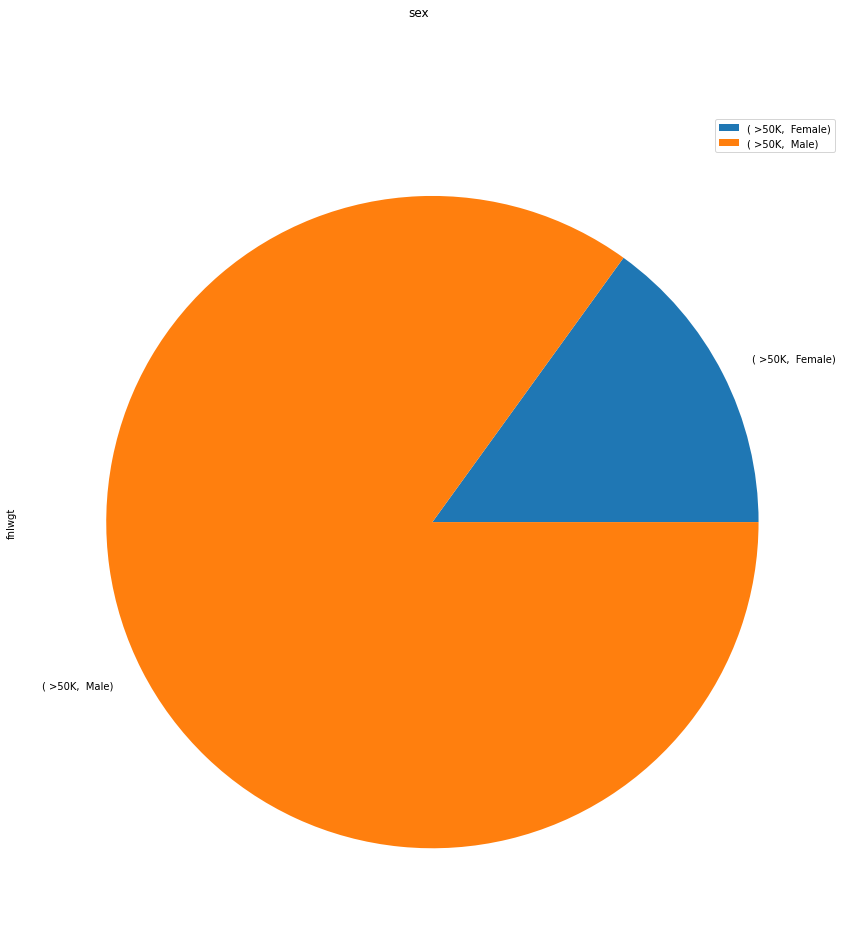

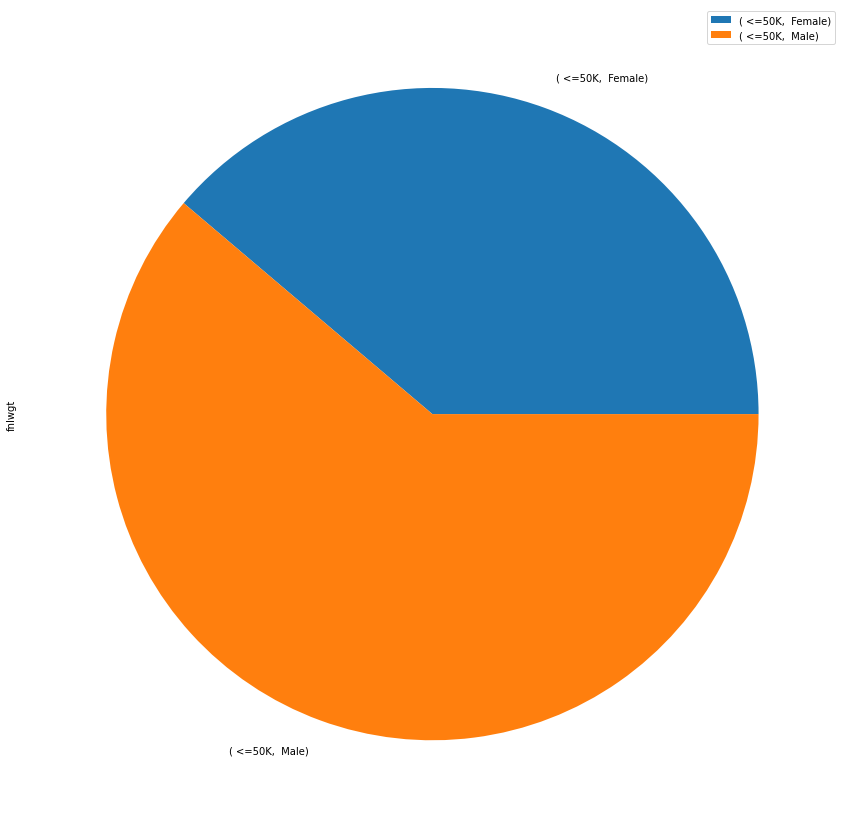

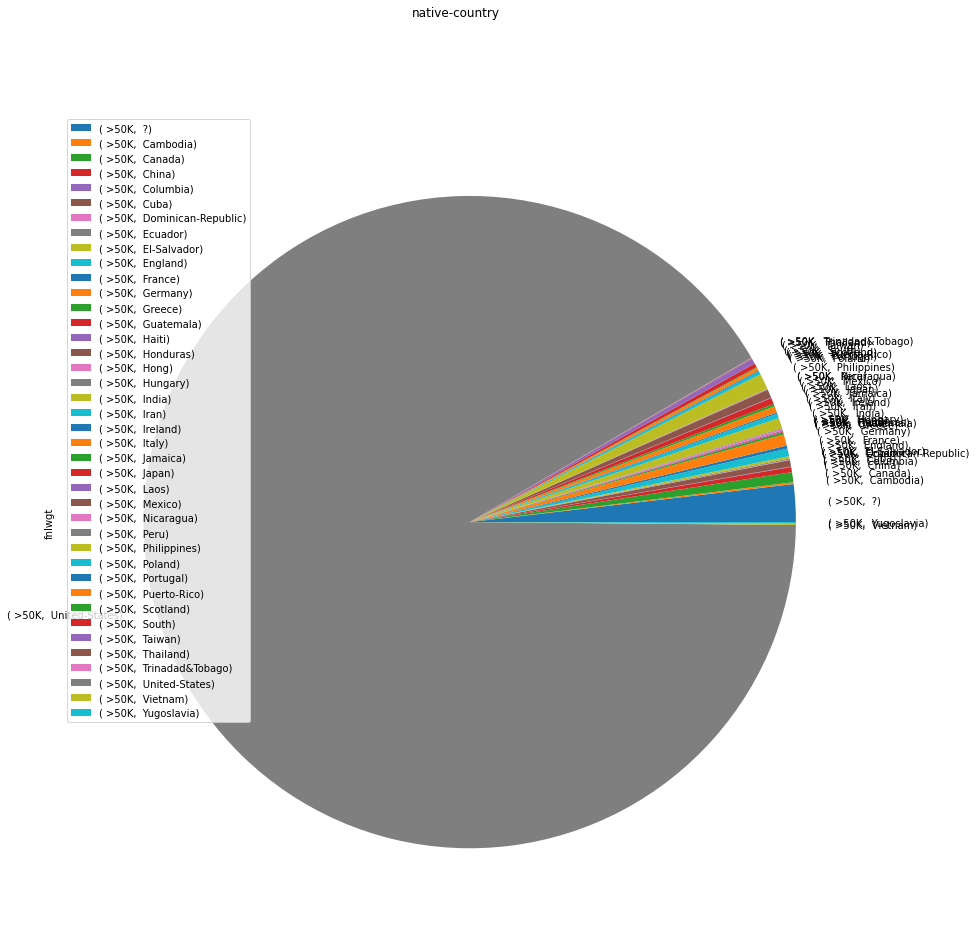

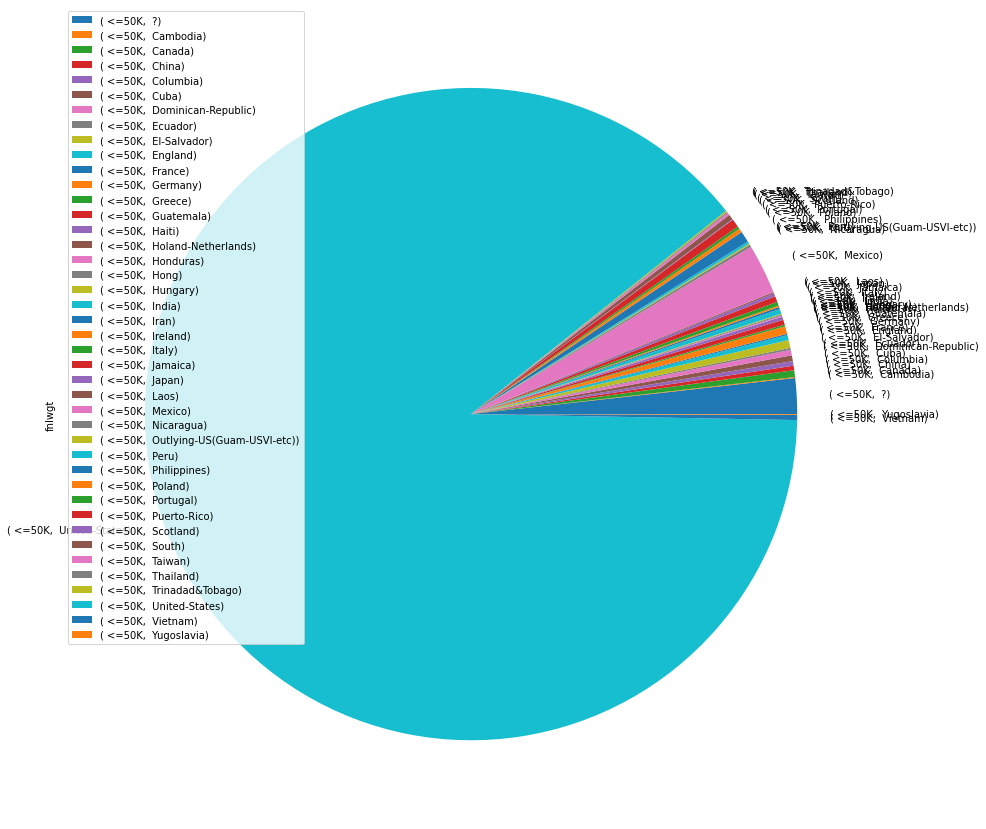

In [11]:
for c in list(ds.dtypes[ds.dtypes=='object'].index)[:-1]:
    try:
        gr_col(c)
    except:
        print(c,'Error')

## Scatter

In [15]:
ds.shape

(32561, 15)

In [16]:
ds2.shape

(32561, 15)

In [12]:
ds2=ds.copy()

In [13]:
from sklearn import preprocessing

for c in tqdm_notebook(list(ds.dtypes[ds.dtypes=='object'].index)):
    le = preprocessing.LabelEncoder()
    ds2[c]=le.fit_transform(ds2[c])

<ipython-input-13-3d929832c872>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for c in tqdm_notebook(list(ds.dtypes[ds.dtypes=='object'].index)):


  0%|          | 0/9 [00:00<?, ?it/s]

In [14]:
ds2.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  inc_class  
0              40              39          0  
1              13              39          0  
2              40              39          0  
3              40              39          0  
4              40               5          0

C:\Users\isa_a\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


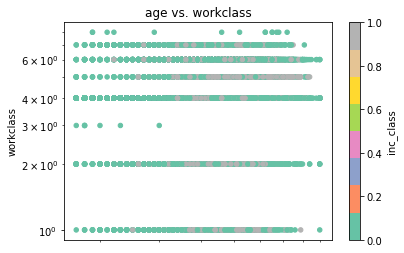

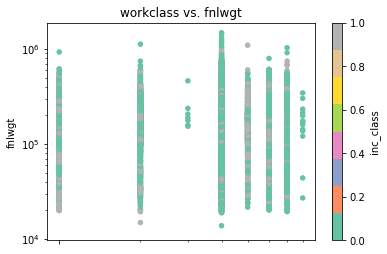

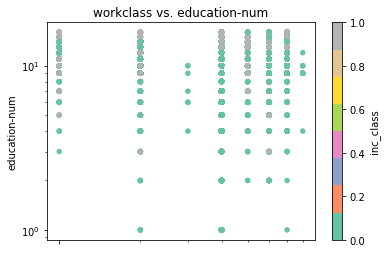

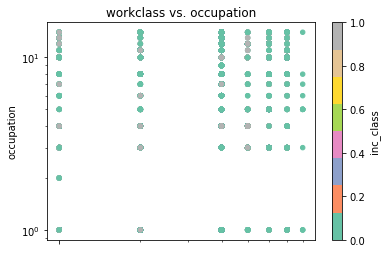

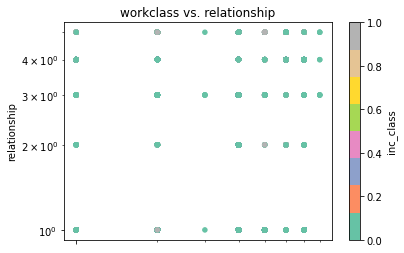

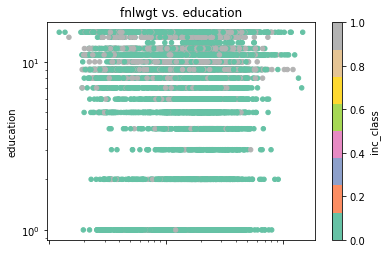

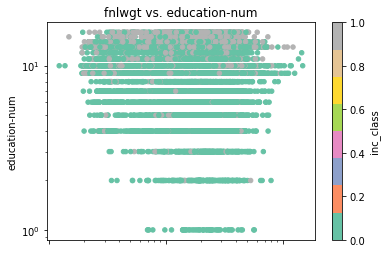

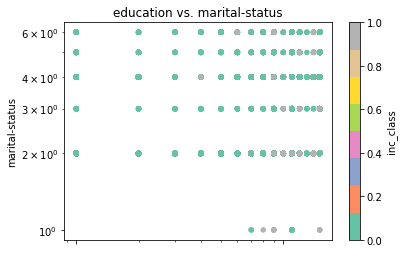

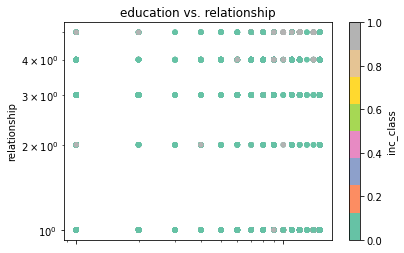

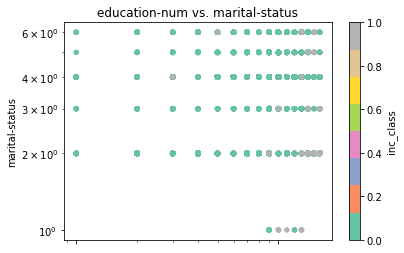

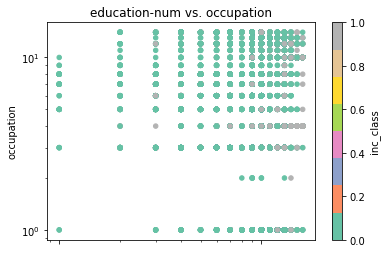

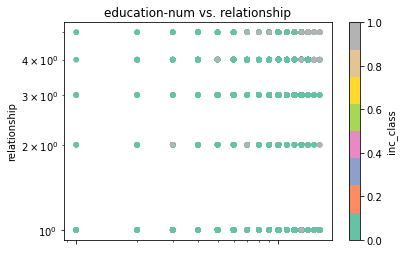

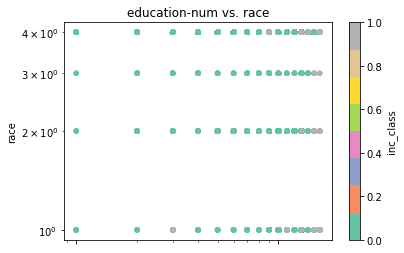

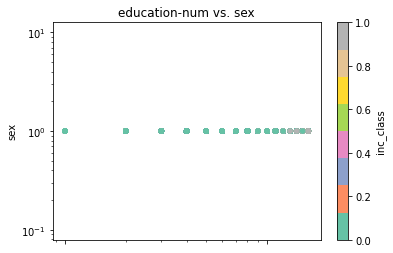

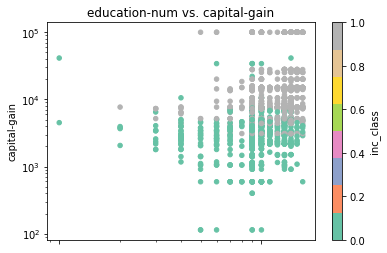

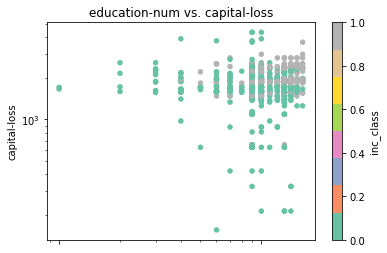

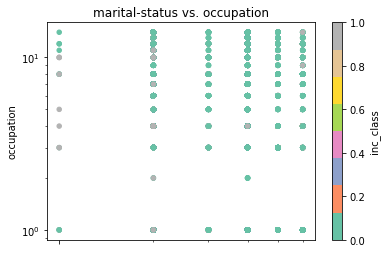

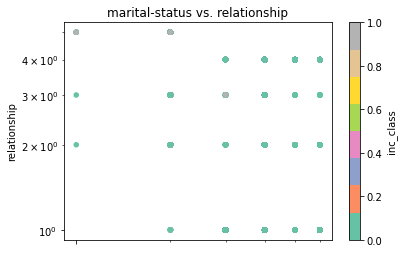

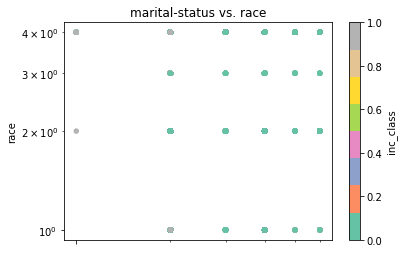

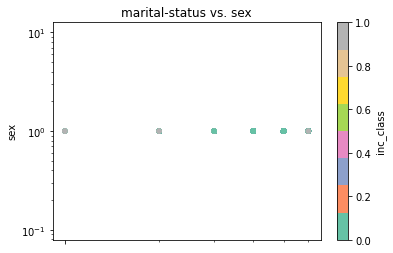

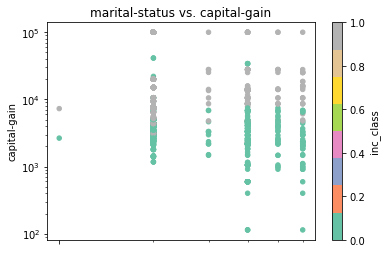

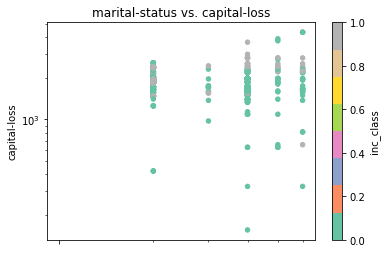

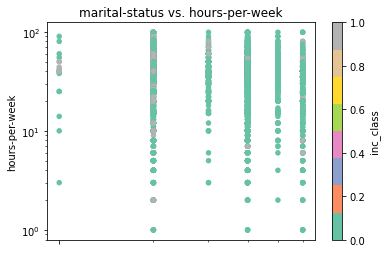

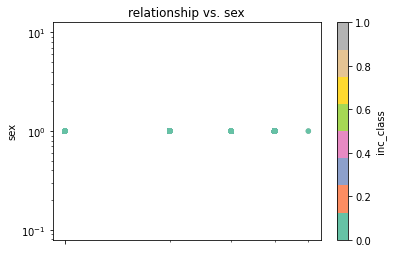

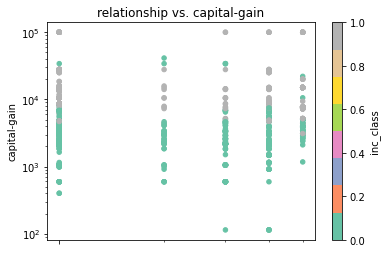

In [17]:
for i in range(len(ds2.columns)-1):
    for j in range(i+1,len(ds2.columns[i])-1):
        #print(i,j)
        ds2.plot(kind='scatter', x=ds2.columns[i], y=ds2.columns[j], colormap='Set2', c='inc_class', title=ds2.columns[i]+' vs. '+ds2.columns[j], loglog=True)

## Pairplot

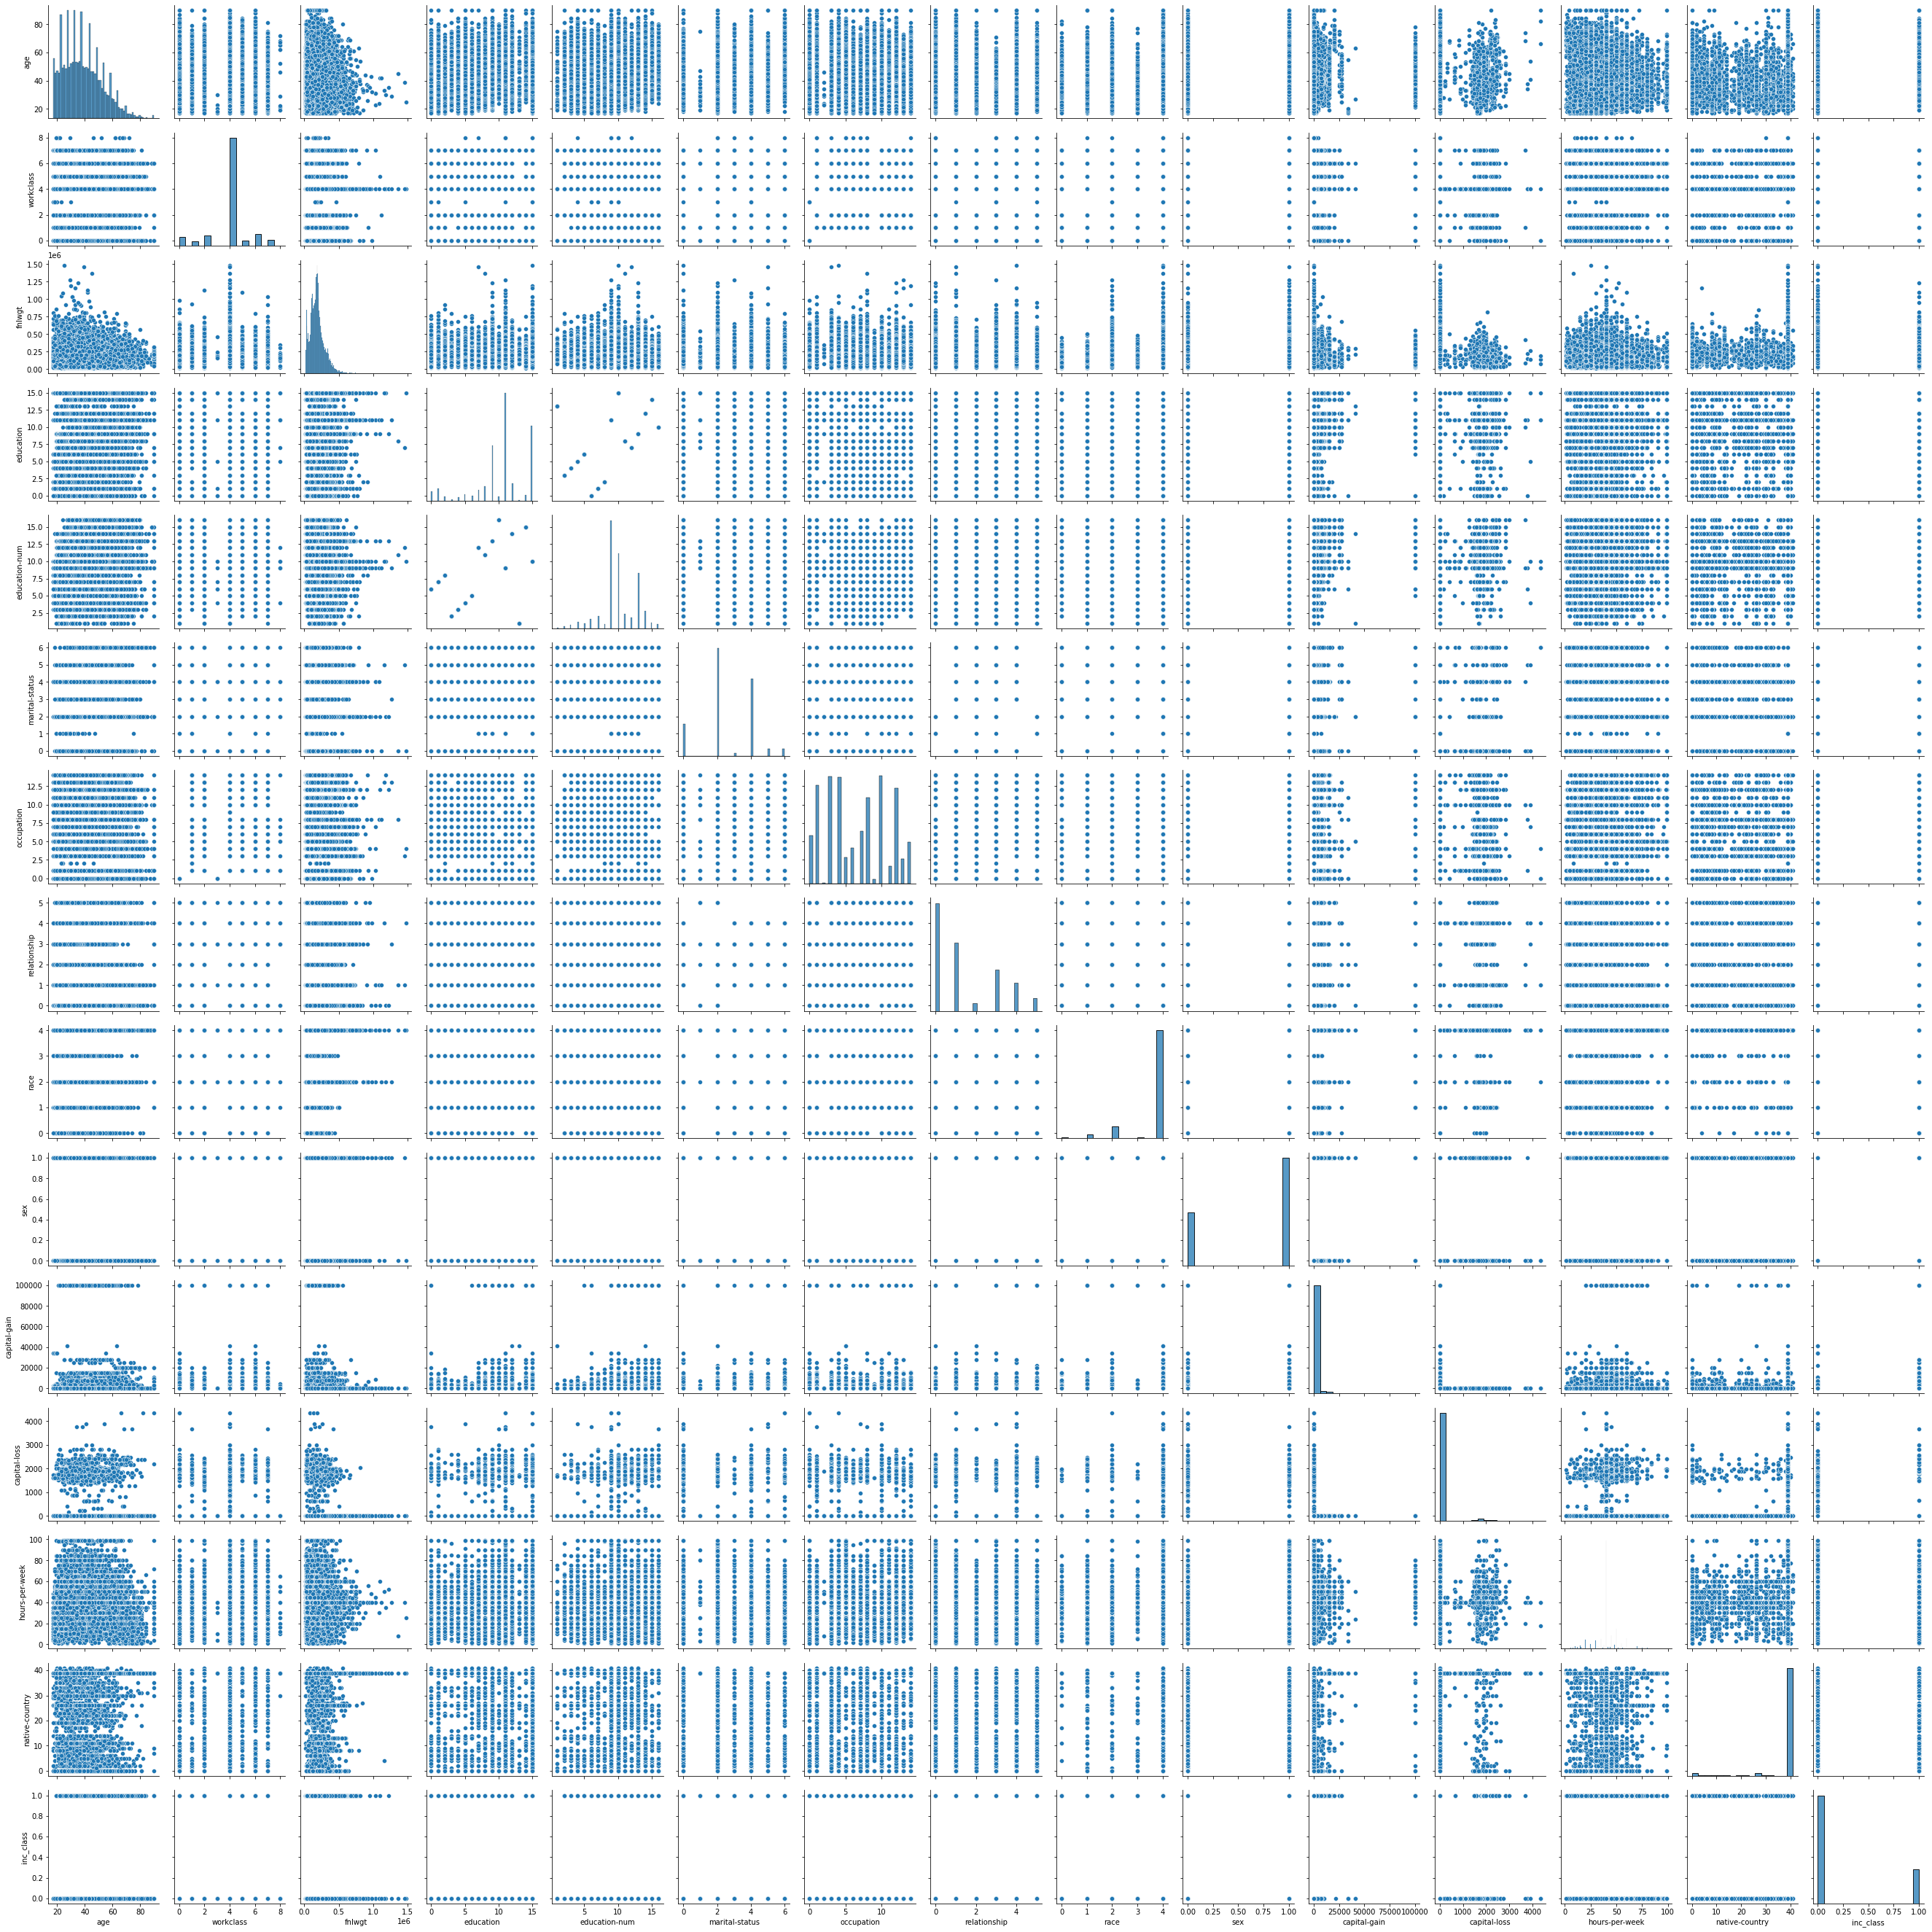

In [18]:
import seaborn as sns
sns.pairplot(ds2)

## Heatmap

<AxesSubplot:>

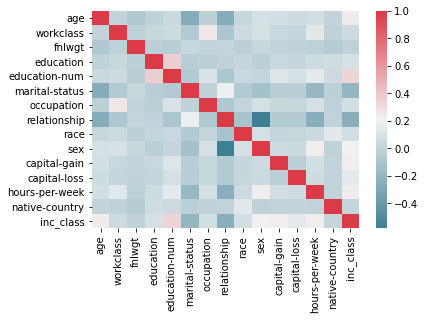

In [19]:
corr = ds2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Important features

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
x=ds2.iloc[:,:-1]
y=ds2.inc_class

In [22]:
clf = GradientBoostingClassifier()
clf.fit(x, y)

GradientBoostingClassifier()

In [23]:
clf.score(x,y)

0.8682165781149228

In [24]:
clf.feature_importances_

array([6.22765797e-02, 4.23691638e-03, 2.93030448e-03, 1.77262753e-04,
       2.04571196e-01, 2.39566930e-02, 2.23032452e-02, 3.50066336e-01,
       6.22280133e-04, 5.62738040e-03, 2.22293382e-01, 6.15633049e-02,
       3.82960168e-02, 1.07910254e-03])

In [25]:
feat_ds=pd.DataFrame()
feat_ds['feat_name']=x.columns
feat_ds['importance']=clf.feature_importances_
feat_ds.sort_values(by='importance', ascending=False)

feat_name  importance
7     relationship    0.350066
10    capital-gain    0.222293
4    education-num    0.204571
0              age    0.062277
11    capital-loss    0.061563
12  hours-per-week    0.038296
5   marital-status    0.023957
6       occupation    0.022303
9              sex    0.005627
1        workclass    0.004237
2           fnlwgt    0.002930
13  native-country    0.001079
8             race    0.000622
3        education    0.000177

<AxesSubplot:xlabel='feat_name'>

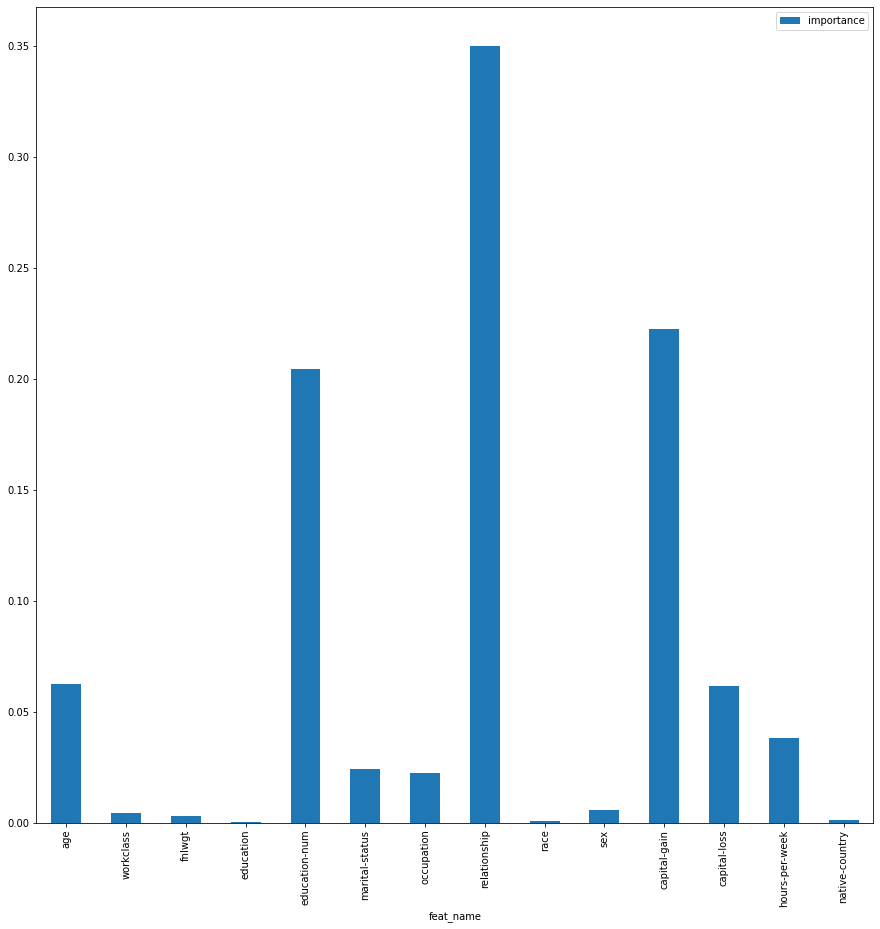

In [26]:
feat_ds.plot(kind='bar', x='feat_name', figsize=(15,15))

Lab2

# Data preprocessing

In [27]:
ds.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
inc_class         0
dtype: int64

# Dimensionality reduction

## PCA

In [29]:
x=ds2.iloc[:,:-1]
y=ds2.inc_class

In [30]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)
pca.fit(x)  

PCA(n_components=2)

In [36]:
pca.explained_variance_ratio_

array([0.99511363, 0.00487184])

In [37]:
x_pca_2D=pca.fit_transform(x)

In [38]:
from matplotlib import pyplot as plt

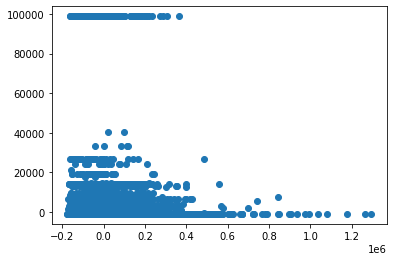

In [39]:
plt.scatter(x_pca_2D[:,0], x_pca_2D[:,1])

In [ ]:
nb_extensions

## TSNE

In [40]:
from sklearn.manifold import TSNE

In [ ]:
 X_embedded = TSNE(n_components=2).fit_transform(x)

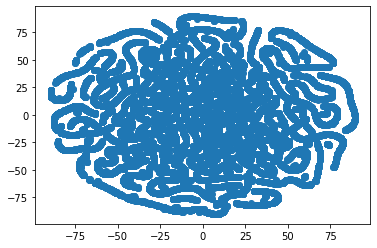

In [28]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

# Classification

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [30]:
clf_models=[GradientBoostingClassifier(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           KNeighborsClassifier(),
           #SVC(),
           GaussianNB(),
           LogisticRegression()]

In [32]:
from sklearn.model_selection import cross_val_score

for m in clf_models:
    m_name=str(m)
    m_name=m_name[:m_name.index('(')]
    cval=cross_val_score(m, x, y, cv=3).mean()
    print(m_name, cval)

GradientBoostingClassifier 0.8642548632482713
DecisionTreeClassifier 0.8141028983326907


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.8491753964212764
KNeighborsClassifier 0.7749148371733411
GaussianNB 0.795184564181039


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.7962286581749543


## Train and test best model

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
best_m=GradientBoostingClassifier()
best_m.fit(X_train,y_train)
best_m.score(X_test,y_test)

0.8686022706123209

Text(0.5,1,'True')

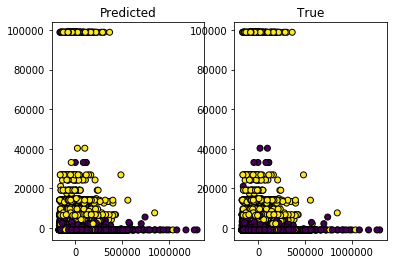

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(x_pca_2D[:,0],x_pca_2D[:,1], edgecolor='black', c=best_m.predict(x))
ax1.set_title('Predicted')
ax2.scatter(x_pca_2D[:,0],x_pca_2D[:,1], edgecolor='black', c=y)
ax2.set_title('True')


Text(0.5,1,'True')

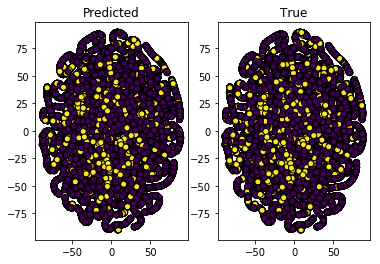

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X_embedded[:,0],X_embedded[:,1], edgecolor='black', c=best_m.predict(x))
ax1.set_title('Predicted')
ax2.scatter(X_embedded[:,0],X_embedded[:,1], edgecolor='black', c=y)
ax2.set_title('True')

## Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [40]:
actual = y_test 
predicted = best_m.predict(X_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[7803  393]
 [1019 1531]]
Accuracy Score : 0.8686022706123209
Report : 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      8196
           1       0.80      0.60      0.68      2550

   micro avg       0.87      0.87      0.87     10746
   macro avg       0.84      0.78      0.80     10746
weighted avg       0.86      0.87      0.86     10746



In [42]:
7803/(7803+1019)

0.8844933121741102

# Clustering

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [48]:
sil_coef=[]
for n in range(2,10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(x)
    s_coef=metrics.silhouette_score(x, kmeans.labels_, metric='euclidean')
    sil_coef.append(s_coef)
    
sil_coef

[0.5858326225411196,
 0.5521135012325068,
 0.5565105284114698,
 0.5323563417870744,
 0.5439069608176007,
 0.5444239156426399,
 0.5385633321609794,
 0.5314333207924923]

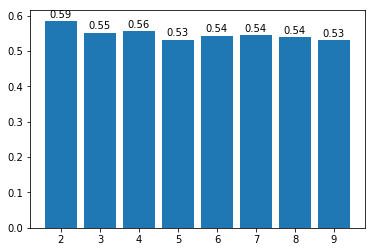

In [68]:
fig, ax = plt.subplots() 
ax.bar([n for n in range(2,10)], sil_coef)
for i, v in enumerate(sil_coef):
    ax.text(i+1.7, sil_coef[i]+0.01, str(round(sil_coef[i],2)))

## Train on best number of classes

In [33]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)

In [102]:
metrics.adjusted_rand_score(y, kmeans.labels_)

-0.0073952832972473265

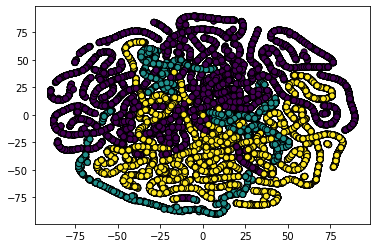

In [34]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], edgecolor='black', c=kmeans.labels_)

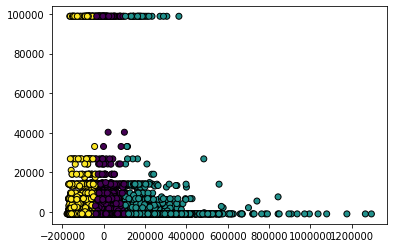

In [35]:
plt.scatter(x_pca_2D[:,0], x_pca_2D[:,1], edgecolor='black', c=kmeans.labels_)

In [36]:
ds2['kmeans']=kmeans.labels_
ds2.groupby('kmeans').mean()

age  workclass         fnlwgt  education  education-num  \
kmeans                                                                  
0       38.363237   3.855886  205038.593228  10.280186      10.060246   
1       36.610335   3.829756  377322.653053  10.149823       9.915607   
2       39.673928   3.902229   93279.099375  10.382557      10.175025   

        marital-status  occupation  relationship      race       sex  \
kmeans                                                                 
0             2.622314    6.602777      1.455271  3.694937  0.664594   
1             2.679100    6.562409      1.444051  3.608460  0.702646   
2             2.570500    6.536559      1.435326  3.650034  0.661854   

        capital-gain  capital-loss  hours-per-week  native-country  inc_class  
kmeans                                                                         
0        1044.460611     85.948549       40.326863       36.466767   0.240671  
1        1123.412794     81.083976       40.275682       36.284018   0.234007  
2        1103.710064     91.645475       40.651638       37.233874   0.243752

# Regression

In [75]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [37]:
x2=x[[ 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'hours-per-week', 'native-country', 'capital-gain', 'capital-loss']]
y2=x['age']#+x[]

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
reg_models=[LinearRegression(),
           Ridge(),
           Lasso(),
           GradientBoostingRegressor(),
           DecisionTreeRegressor(),
           RandomForestRegressor()]

In [93]:
for m in tqdm_notebook(reg_models):
    m_name=str(m)
    m_name=m_name[:m_name.index('(')]
    cval=cross_val_score(m, x2, y2, cv=3).mean()
    print(m_name, cval)

LinearRegression 0.13274285577660316
Ridge 0.1327428765753469
Lasso 0.12038185588989092
GradientBoostingRegressor 0.46015238712537115
DecisionTreeRegressor 0.12211140130397813


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor 0.3643748241767733



## Train best model

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [143]:
best_m2=GradientBoostingRegressor()
best_m2.fit(X_train,y_train)
best_m2.score(X_test,y_test)

0.45899071548592096

In [149]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, best_m2.predict(X_test))

7.783491127261338

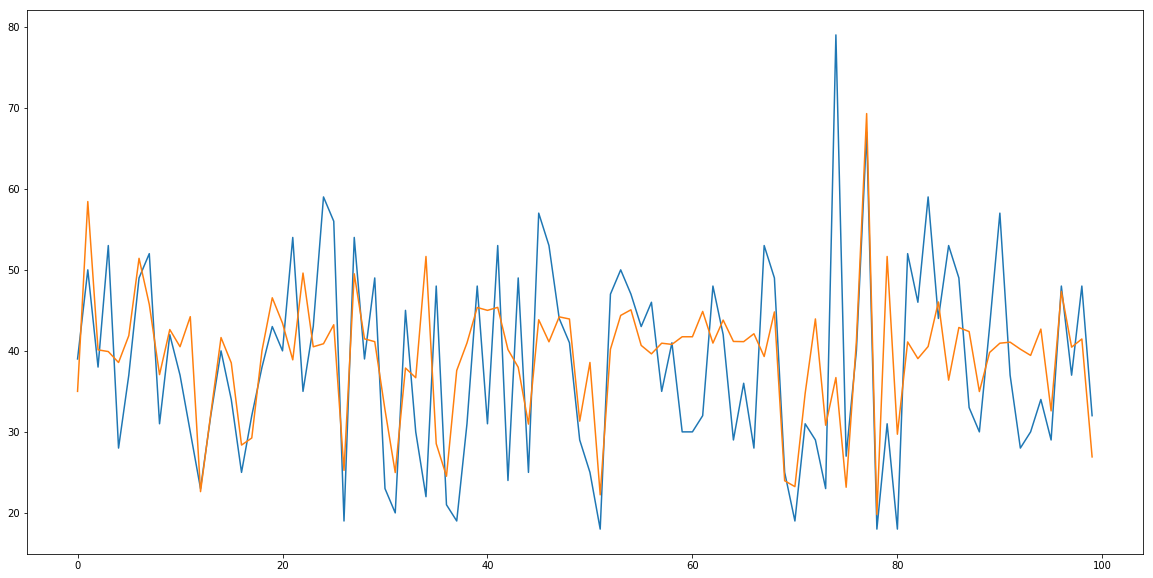

In [147]:
plt.figure(figsize=(20,10))
plt.plot(y2[:100])
plt.plot(best_m2.predict(x2)[:100])